In [1]:
from LassoLayer import LassoLayer
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

data = np.load('boston_housing.npz')

In [2]:
x = data['x']
y = data['y']
scaler = MinMaxScaler(feature_range=(0, 1))

input_df = scaler.fit_transform(x)
#input_df = x
output_df = y

In [9]:
from keras.layers import Input, Dense, LeakyReLU, Layer, Dropout
from keras.models import Model
import keras.backend as K
from keras import regularizers
from keras.losses import categorical_crossentropy, binary_crossentropy, hinge, squared_hinge
from keras import backend as K
from keras.layers import Layer
from keras.optimizers import Adam
import tensorflow as tf


inputs = Input(shape=(input_df.shape[1],))
lasso = LassoLayer(input_df.shape[1], kernel_regularizer=tf.keras.regularizers.l1(.4))
lasso_layer = lasso(inputs)
dense1 = Dense(12, activation='sigmoid')(lasso_layer)
dense2 = Dense(3, activation='linear', name='embedding')(dense1)
output = Dense(1, activation='linear')(dense2)
model = Model(inputs=inputs, outputs=output)
model.compile(loss='mse', optimizer = 'sgd', metrics = ['mse'])
model.fit(input_df, output_df,epochs = 50, batch_size = 10, validation_split=.2, verbose=0)

In [10]:
import seaborn as sns
intermediate_layer_model = Model(inputs=model.input,
                                       outputs=model.get_layer('embedding').output)
embedding = intermediate_layer_model.predict(input_df)


<IPython.core.display.Javascript object>


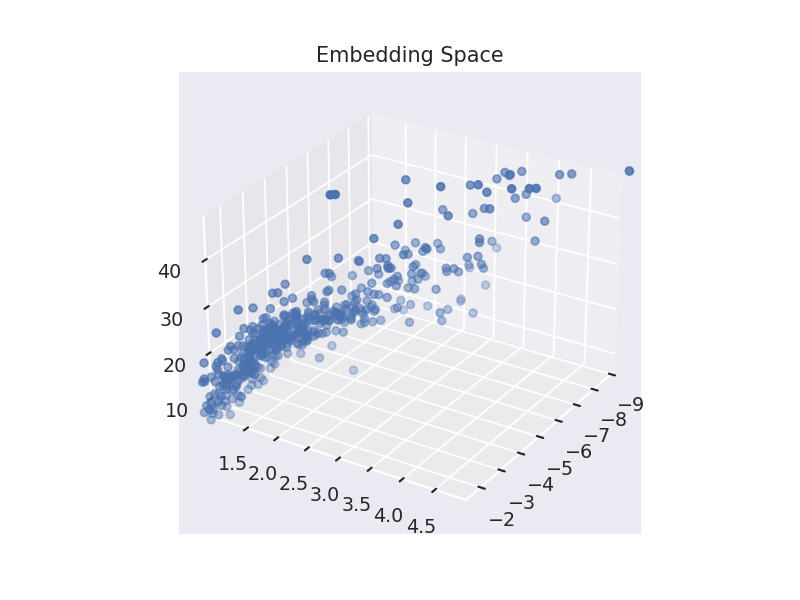

In [20]:
%matplotlib notebook

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plotting_df = pd.DataFrame({'x': embedding[:,0], 'y': embedding[:,1], 'z': embedding[:,2]})

sns.set(style = "darkgrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
ax.scatter(plotting_df['x'], plotting_df['z'], y)
ax.xlabel
plt.title('Embedding Space')
plt.show()


<IPython.core.display.Javascript object>


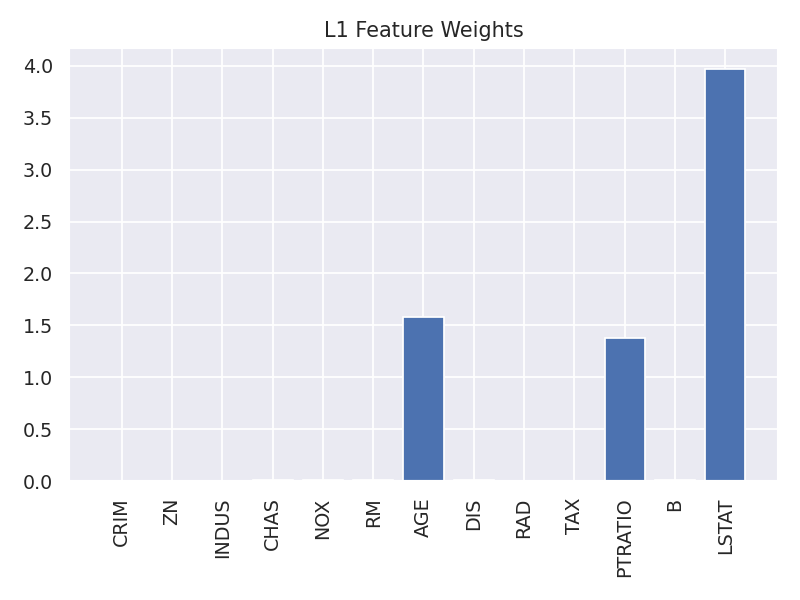

In [16]:
%matplotlib notebook

import matplotlib.pyplot as plt
import numpy as np

# note the features are a bit stochastic in nature given the fact that I didn't bother to 
# remove all correlated features. 

features = ['CRIM', 
'ZN',
'INDUS',
'CHAS',
'NOX',
'RM',
'AGE',
'DIS',
'RAD',
'TAX',
'PTRATIO',
'B',
'LSTAT']


weights = lasso.get_weights()
plt.bar(features, np.abs(weights[0][0]))
plt.xticks(rotation=90)

plt.title('L1 Feature Weights')
plt.tight_layout()
